# FinOL
## Tutorial 2: Loading the Dataset
In Tutorial 2, we will use the dataset ``SP500`` as an example to implement a complete data call. In ``FinOL``, the call to the dataset is encapsulated in a function, which concatenates all the functions covered in Tutorial 1. You only need to configure the parameters related to the data layer in ``config.py`` to obtain the dataset.

Similarly, to get started, we first import ``data_loader`` from the ``FinOL`` package and configure the environment for Tutorial 2:

In [1]:
import re
import matplotlib.pyplot as plt
from finol.data_layer.data_loader import *
from finol.config import ROOT_PATH

with open(ROOT_PATH + '\config.py', 'r') as file:
    content = file.read()

content = re.sub(r'(TUTORIAL_MODE\s*=\s*).*', r'\g<1>True', content)
content = re.sub(r'(TUTORIAL_NAME\s*=\s*").*?(")', r'\g<1>' + "TUTORIAL_2" + r'\g<2>', content)

with open(ROOT_PATH + 'config.py', 'w') as file:
    file.write(content)


**Configuring the Data Layer**

To load the dataset, the following parameters need to be configured in ``config.py``:

```python
DATASET_NAME = "SP500"  # Available options: NYSE(O), NYSE(N), DJIA, SP500, TSE, SSE, HSI, CMEG, TUTORIAL
FEATURE_ENGINEERING_CONFIG = {
    "INCLUDE_OHLCV_FEATURES": True,
    "INCLUDE_OVERLAP_FEATURES": True,
    "INCLUDE_MOMENTUM_FEATURES": True,
    "INCLUDE_VOLUME_FEATURES": True,
    "INCLUDE_CYCLE_FEATURES": True,
    "INCLUDE_PRICE_FEATURES": True,
    "INCLUDE_VOLATILITY_FEATURES": True,
    "INCLUDE_PATTERN_FEATURES": True
}
DATA_AUGMENTATION_CONFIG = {
    "WINDOW_DATA": {
        "INCLUDE_WINDOW_DATA": False,
        "WINDOW_SIZE": 10
    }
}
NORMALIZATION_METHOD = "MIN_MAX"  # Available options: MaIN_MAX, ROBUST
BATCH_SIZE = 128
```

**However, not all parameters can be adjusted, such as the division of training sets, verification sets, and test sets, we recommend that no adjustments be made.**

Once the parameters have been configured in ``config.py``, one can easily load the dataset using the following code:

```python
train_loader, val_loader, test_loader, info_dict = load_dataset()
````

The ``load_dataset`` function will divide the complete dataset into separate training, validation and test sets, and encapsulates them into PyTorch DataLoader objects for easy batch processing. It also returns some metadata in an info_dict.

In [2]:
# Load the dataset using the load_dataset function
load_dataset_output = load_dataset()
load_dataset_output

Data Loading: 100%|██████████| 26/26 [00:13<00:00,  1.95it/s]


Successfully loaded 26 Excel file(s):

Data Processing: 100%|██████████| 26/26 [00:32<00:00,  1.27s/it]


{'train_loader': <torch.utils.data.dataloader.DataLoader at 0x243cbc0b460>,
 'val_loader': <torch.utils.data.dataloader.DataLoader at 0x243cbc0b820>,
 'test_loader': <torch.utils.data.dataloader.DataLoader at 0x243cbc0ba90>,
 'NUM_TRAIN_PERIODS': 3293,
 'NUM_VAL_PERIODS': 1130,
 'NUM_TEST_PERIODS': 1131,
 'NUM_ASSETS': 26,
 'NUM_FEATURES_AUGMENTED': 1430,
 'NUM_FEATURES_ORIGINAL': 143,
 'WINDOW_SIZE': 10}

DataLoaders are useful for batch-based training as they allow efficiently iterating over datasets. They will feed mini-batches of samples into our model during training. The following code demonstrates the process of iterating over the training loader to access the training data batches.

To validate the loaders, we iterate over the training set using ``enumerate`` and break out of the loop after one batch. This prints the batch number, shape of the input features and shape of labels for the first batch. This acts as a sanity check in the tutorial.

In [3]:
train_loader = load_dataset_output["train_loader"]
concatenated_data = []
concatenated_label = []

# Iterate over the training loader
for i, data in enumerate(train_loader, 1):
    # Extract the input data and labels from the batch
    x_data, label = data

    break

    concatenated_data.append(x_data)
    concatenated_label.append(label)

    # Print the batch information
    print(f'Number of batch: {i} \n'
          f'Shape of x_data: {x_data.shape} \n'
          f'Shape of label: {label.shape}')

# Concatenate the tensors in the concatenated_data and concatenated_label lists
# concatenated_data = torch.cat(concatenated_data, dim=0)
# concatenated_label = torch.cat(concatenated_label, dim=0)

# Print the shape of the concatenated tensors
# print(f'Shape of concatenated_data: {concatenated_data.shape}')
# print(f'Shape of concatenated_label: {concatenated_label.shape}')

Based on the specific dataset and preprocessing pipeline used. Here the expected shape of the input ``x_data`` should be ``torch.size([128, 23, 1430])``. We can see it has a batch size of 128 samples (periods), with 23 assets, and the feature representation for each asset has a very high dimension of 1430 after preprocessing by ``data_layer``.

This high dimensional feature embedding is expected since the dataset has likely undergone transformations like feature engineering, data augmentation, and other transformations to capture deep representation of assets.

The shape of ``label`` should be ``torch.size([128, 23])``. Similar to the ``x_data``, the dimensions are specified as ``[BATCH_SIZE, NUM_ASSETS]``, and each sample of input data (``torch.size([23, 1430])``) is paired with its corresponding label (price relative vector, ``torch.size([23])``).

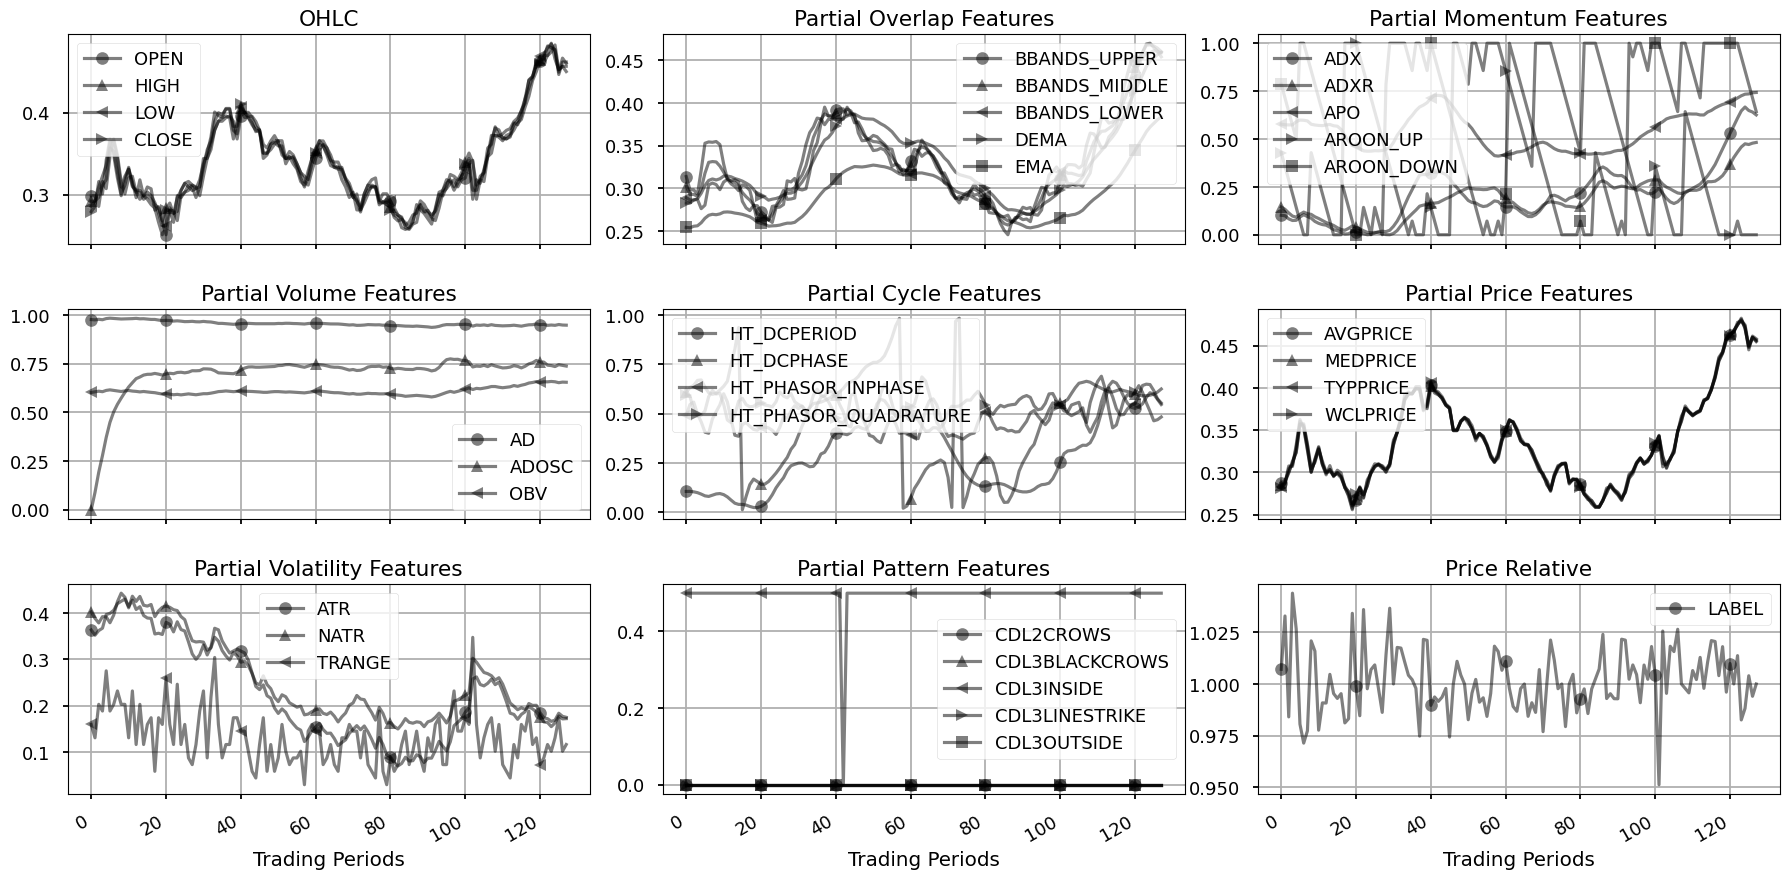

In [18]:
plt.style.use('seaborn-talk')  # fivethirtyeight bmh seaborn-talk seaborn-poster seaborn-white
ASSET_INDEX = 0
plot_data = x_data
plot_data_2 =  label
markers = ['o', '^', '<', '>', 's', 'p', 'h', '+', 'x', '|', '_']
markevery = 20
alpha = 0.5

# Create a figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 10))

# Plot the first subplot
OHLC = ['OPEN', 'HIGH', 'LOW', 'CLOSE']
for i, m in enumerate(OHLC):
  axs[0, 0].plot(plot_data[:, ASSET_INDEX, i], marker=markers[i], color='black', markevery=markevery, alpha=alpha)
axs[0, 0].set_title('OHLC')
axs[0, 0].legend(OHLC, loc='best')
axs[0, 0].grid(True)

# Plot the second subplot
partial_overlap_features = ['BBANDS_UPPER', 'BBANDS_MIDDLE', 'BBANDS_LOWER', 'DEMA', 'EMA']
for i, m in enumerate(partial_overlap_features):
  axs[0, 1].plot(plot_data[:, ASSET_INDEX, 5+i], marker=markers[i], color='black', markevery=markevery, alpha=alpha)
axs[0, 1].set_title('Partial Overlap Features')
axs[0, 1].legend(partial_overlap_features, loc='best')
axs[0, 1].grid(True)


# Plot the third subplot
partial_momentum_features = ['ADX', 'ADXR', 'APO', 'AROON_UP', 'AROON_DOWN']
for i, m in enumerate(partial_momentum_features):
  axs[0, 2].plot(plot_data[:, ASSET_INDEX, 25+i], marker=markers[i], color='black', markevery=markevery, alpha=alpha)
axs[0, 2].set_title('Partial Momentum Features')
axs[0, 2].legend(partial_momentum_features, loc='best')
axs[0, 2].grid(True)


# Plot the fourth subplot
partial_volume_features = ['AD', 'ADOSC', 'OBV']
for i, m in enumerate(partial_volume_features):
  axs[1, 0].plot(plot_data[:, ASSET_INDEX, 65+i], marker=markers[i], color='black', markevery=markevery, alpha=alpha)
axs[1, 0].set_title('Partial Volume Features')
axs[1, 0].legend(partial_volume_features, loc='best')
axs[1, 0].grid(True)


# Plot the fifth subplot
partial_cycle_features = ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_INPHASE', 'HT_PHASOR_QUADRATURE']
for i, m in enumerate(partial_cycle_features):
  axs[1, 1].plot(plot_data[:, ASSET_INDEX, 68+i], marker=markers[i], color='black', markevery=markevery, alpha=alpha)
axs[1, 1].set_title('Partial Cycle Features')
axs[1, 1].legend(partial_cycle_features, loc='best')
axs[1, 1].grid(True)


# Plot the sixth subplot
partial_price_features = ['AVGPRICE', 'MEDPRICE', 'TYPPRICE', 'WCLPRICE']
for i, m in enumerate(partial_price_features):
  axs[1, 2].plot(plot_data[:, ASSET_INDEX, 75+i], marker=markers[i], color='black', markevery=markevery, alpha=alpha)
axs[1, 2].set_title('Partial Price Features')
axs[1, 2].legend(partial_price_features, loc='best')
axs[1, 2].grid(True)


# Plot the seventh subplot
partial_volatility_features = ['ATR', 'NATR', 'TRANGE']
for i, m in enumerate(partial_volatility_features):
  axs[2, 0].plot(plot_data[:, ASSET_INDEX, 79+i], marker=markers[i], color='black', markevery=markevery, alpha=alpha)
axs[2, 0].set_title('Partial Volatility Features')
axs[2, 0].legend(partial_volatility_features, loc='best')
axs[2, 0].set_xlabel('Trading Periods')
axs[2, 0].grid(True)


# Plot the eighth subplot
partial_pattern_features = ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE']
for i, m in enumerate(partial_pattern_features):
  axs[2, 1].plot(plot_data[:, ASSET_INDEX, 82+i], marker=markers[i], color='black', markevery=markevery, alpha=alpha)
axs[2, 1].set_title('Partial Pattern Features')
axs[2, 1].legend(partial_pattern_features, loc='best')
axs[2, 1].set_xlabel('Trading Periods')
axs[2, 1].grid(True)


# Plot the ninth subplot
label_ = 'LABEL'
axs[2, 2].plot(plot_data_2[:, ASSET_INDEX].numpy(), marker=markers[0], color='black', markevery=markevery, alpha=alpha)
axs[2, 2].set_title('Price Relative')
axs[2, 2].legend([label_], loc='best')
axs[2, 2].set_xlabel('Trading Periods')
axs[2, 2].grid(True)


# Adjust the spacing between subplots
plt.tight_layout()

# Autoformat the date labels
fig.autofmt_xdate()
plt.savefig('1.pdf',
            format='pdf',
            dpi=300,
            bbox_inches='tight')
# Show the plot
plt.show()

In [12]:
plt.style.use('seaborn-talk')  # fivethirtyeight bmh seaborn-talk seaborn-poster seaborn-white

In future tutorials, we will use these DataLoaders to train models on mini-batches of data. The well-encapsulated data provided by the above steps is an important initial step in any machine learning workflow.

[
    'Solarize_Light2',
    '_classic_test_patch',
    '_mpl-gallery',
    '_mpl-gallery-nogrid',
    'bmh',
    'classic',
    'dark_background',
    'fast',
    'fivethirtyeight',
    'ggplot',
    'grayscale',
    'seaborn',
    'seaborn-bright',
    'seaborn-colorblind',
    'seaborn-dark',
    'seaborn-dark-palette',
    'seaborn-darkgrid',
    'seaborn-deep',
    'seaborn-muted',
    'seaborn-notebook',
    'seaborn-paper',
    'seaborn-pastel',
    'seaborn-poster',
    'seaborn-talk',
    'seaborn-ticks',
    'seaborn-white',
    'seaborn-whitegrid',
    'tableau-colorblind10'
]

In [ ]:
with open(config_path, 'r') as file:
    content = file.read()

content = re.sub(r'(TUTORIAL_MODE\s*=\s*).*', r'\g<1>False', content)

with open(config_path, 'w') as file:
    file.write(content)